<>:116: SyntaxWarning: invalid escape sequence '\m'
<>:117: SyntaxWarning: invalid escape sequence '\m'
<>:116: SyntaxWarning: invalid escape sequence '\m'
<>:117: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1868/2417002839.py:116: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$^\mu$')
/tmp/ipykernel_1868/2417002839.py:117: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('s($^\mu$)')


Filename: ../../data/rim_[SII]_wcs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      76   (2080, 1392)   float32   


,0,1,2,3,4,5,6,7,8,9,...,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,324.0,319.0,321.0,325.0,328.0,330.0,333.0,334.0,336.0,337.0,...,562.0,558.0,557.0,555.0,554.0,554.0,510.0,405.0,242.0,124.0
2,577.0,580.0,580.0,579.0,587.0,588.0,591.0,595.0,588.0,589.0,...,754.0,742.0,741.0,741.0,739.0,742.0,643.0,462.0,272.0,133.0
3,744.0,742.0,732.0,730.0,740.0,741.0,741.0,742.0,736.0,735.0,...,765.0,751.0,750.0,758.0,762.0,769.0,660.0,459.0,267.0,130.0
4,774.0,766.0,764.0,763.0,762.0,771.0,767.0,759.0,758.0,759.0,...,766.0,755.0,752.0,753.0,755.0,774.0,665.0,457.0,268.0,131.0


(no. rows, no. columns) for the SII file: (1392, 2080)
Filename: ../../data/rim_Ha_wcs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      76   (2080, 1392)   float32   
(no. rows, no. columns) for the Ha file: (1392, 2080)
Filename: ../../data/rim_R_wcs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   (2080, 1392)   float32   
(no. rows, no. columns) for the Ha file: (1392, 2080)
Optimal scale factor: 1.407035175879397


/home/joshua_ong/software/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


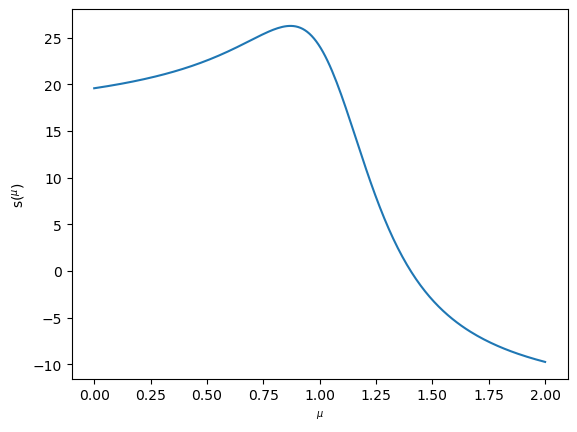

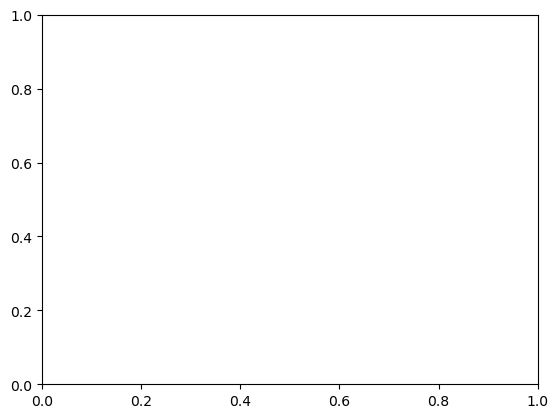

In [ ]:
import numpy as np

import pandas as pd

from astropy.io import fits

import math

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import SymLogNorm

# Current directory is where the code file is in
# SII file (narrowband FITs file):
hdu_SII = fits.open('../../data/rim_[SII]_wcs.fits')

hdu_SII.info()

df_SII = pd.DataFrame(hdu_SII[0].data)

# check if the FITs file was converted to a data frame successfully
display(df_SII.head())

# check if all the rows and columns are retained in the dataframe
print("(no. rows, no. columns) for the SII file:", df_SII.shape)


# H alpha file (narrow band FITs file):
hdu_Ha = fits.open('../../data/rim_Ha_wcs.fits')

hdu_Ha.info()

df_Ha = pd.DataFrame(hdu_Ha[0].data)


# check if all the rows and columns are retained in the dataframe
print("(no. rows, no. columns) for the Ha file:", df_Ha.shape)


# R file (i.e. the broadband FITs file):
hdu_R = fits.open('../../data/rim_R_wcs.fits')

# hdu_R.info()

df_R = pd.DataFrame(hdu_R[0].data)


# check if all the rows and columns are retained in the dataframe
print("(no. rows, no. columns) for the Ha file:", df_R.shape)


# define a function to do NB - mu*BB
def continuum_component_remover(NB_df, BB_df, mu):
    """
    Does Narrowband - (scaling parameter)(Broadband).

    Parameters
    ----------
    NB_df: datafile 
        Narrowband datafile
    BB_df: datafile
        Broadband datafile
        
    mu: int, float
        The scaling parameter
        
    Returns
    -------
    Residual: datafile
        The residual datafile"""

    Residual = NB_df - mu*BB_df

    return Residual

#SII_residual = continuum_component_remover(df_SII, df_R, 1)


# define a function to calculate the skewness
def skewness_calculator(Residual_df):
    """
    Calculates the skewness according to equation 1 from the paper (Sungryong Hong et al, 2014, Publications of the Astronomical Society of the Pacific).

    Parameters
    ----------
    Residual_df: dataframe
        The dataframe of the result from executing the continuum_component_remover function.
        
    Returns
    -------
    skewness: float
        The value of the skewness for the scaling parameter used when executing the continuum_component_remover function."""

    # N = Residual_df.size
    # Residual_df - Residual_df.mean())/Residual_df.std() calculates the difference between each value in the dataframe Residual_df and the mean of all values in the dataframe then divides each result by the standard deviation of the values in the dataframe.
    # .power(3) cubes each value from the above operation.
    # .values.sum() takes all the values from the resulting dataframe after the above operations and sums up all the values.
    skewness = (1/(Residual_df.size - 1)*((((Residual_df - Residual_df.values.mean())/Residual_df.values.std()).pow(3)).values.sum()))

    return skewness

# Create a numpy array of scaling factors
mus = np.linspace(0, 2, 200)

# Initialise list of skewness values
skewness_vals = []

for mu in mus:
    residual = continuum_component_remover(df_Ha, df_R, mu)
    skewness_vals.append(skewness_calculator(residual))


# Plot scale factor vs skewness value
plot = plt.plot(mus, skewness_vals)
# Set axis labels, anything in between $^\$ will be displayed as a mathematical symbol
plt.xlabel('$^\mu$')
plt.ylabel('s($^\mu$)')


# make a matplotlib animated plot of the residual image
# Create a figure for the animation
fig, ax = plt.subplots()

def animate(t):
    plt.cla()
    scale_factor = mus[t]

    # Create a colormap in logscale
    img = ax.imshow(
        ax.continuum_component_remover(df_Ha, df_R, scale_factor,
        norm = plt.colors.SymLogNorm(linthresh = 0.03, linscale = 0.03, vmin = -1e4, vmax = 1e4), cmap ='RdBu_r')
    )

    plt.text(0, -10, f"mu = {scale_factor}")
    if t == 1: fig.colorbar(img)

animation.FuncAnimation(fig, animate, frames=25)


# Change all skewness values to absolute values for the next step
for i in range(len(skewness_vals)):
    skewness_vals[i] = abs(skewness_vals[i])



# The index of the skewness value which is closest to 0 is the same as the index of the minimum absolute skewness value
index_optimal = skewness_vals.index(min(skewness_vals))

print("Optimal scale factor:", mus[index_optimal])

In [6]:
# View all headers of the SII FITS file
hdu_SII[0].header


SIMPLE  =                    T / Created by AstroImageJ v5.0.0.00               
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2080 / length of data axis 1                          
NAXIS2  =                 1392 / length of data axis 2                          
MIPS-HI =                 4115                                                  
MIPS-LO =                 2915                                                  
MIPS-X1 =                    0                                                  
MIPS-Y1 =                    0                                                  
MIPS-X2 =                    0                                                  
MIPS-Y2 =                    0                                                  
MIPS-BIX=                    1                                                  
MIPS-BIY=                   

In [13]:
from astropy.table import Table

print(Table(hdu_SII[0].data))

 col0   col1   col2   col3   col4  ... col2075 col2076 col2077 col2078 col2079
------ ------ ------ ------ ------ ... ------- ------- ------- ------- -------
   0.0    0.0    0.0    0.0    0.0 ...     0.0     0.0     0.0     0.0     0.0
 324.0  319.0  321.0  325.0  328.0 ...   554.0   510.0   405.0   242.0   124.0
 577.0  580.0  580.0  579.0  587.0 ...   742.0   643.0   462.0   272.0   133.0
 744.0  742.0  732.0  730.0  740.0 ...   769.0   660.0   459.0   267.0   130.0
 774.0  766.0  764.0  763.0  762.0 ...   774.0   665.0   457.0   268.0   131.0
 768.0  770.0  777.0  775.0  767.0 ...   760.0   649.0   449.0   260.0   125.0
 766.0  769.0  775.0  779.0  772.0 ...   767.0   650.0   450.0   263.0   128.0
 761.0  769.0  774.0  770.0  765.0 ...   762.0   645.0   449.0   260.0   127.0
1076.0 1077.0 1073.0 1070.0 1073.0 ...   769.0   646.0   448.0   262.0   125.0
1398.0 1402.0 1396.0 1396.0 1395.0 ...   763.0   640.0   450.0   266.0   130.0
   ...    ...    ...    ...    ... ...     ...     .

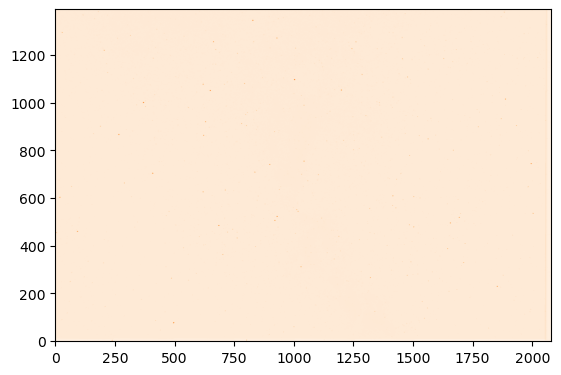

In [96]:
plt.imshow(continuum_component_remover(df_Ha, df_R, 0.7), origin = 'lower', cmap = 'Oranges')

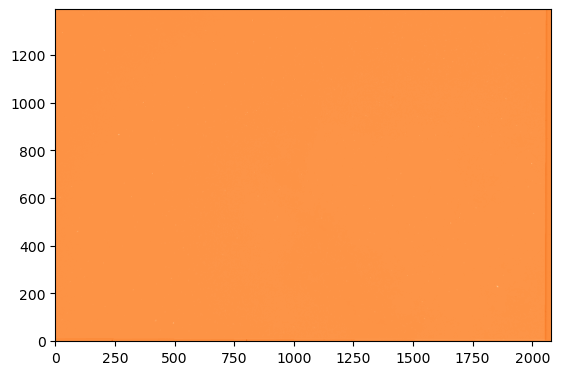

In [108]:
plt.imshow(continuum_component_remover(df_Ha, df_R, 1.407035175879397), origin = 'lower', cmap = 'Oranges')

# Tests
## continuum_component_remover function test

In [82]:
# test skewness calculator
df1 = pd.DataFrame({0: [12, 4, 5, 8], 1: [7, 2, 54, 3]})

df2 = pd.DataFrame({0: [7, 2, 54, 3], 1: [20, 16, 11, 8]})

residual_test = continuum_component_remover(df1, df2, .5)

print("df1:")
display(df1)

print("df2:")
display(df2)

print("residual (df1 - df2):")
display(residual_test)

df1:


,0,1
0,12,7
1,4,2
2,5,54
3,8,3


df2:


,0,1
0,7,20
1,2,16
2,54,11
3,3,8


residual (df1 - df2):


,0,1
0,8.5,-3.0
1,3.0,-6.0
2,-22.0,48.5
3,6.5,-1.0


* continuum_component_remover function confirmed to work

## skewness_calculator test

In [3]:
df3 = df1[0:2]

display(df3)

print("df3.mean():", df3.mean(), "\nThis is not what we want.", "\n\n")
print("df3.values.mean():", df3.values.mean(), "\n\n")

print("df3.std():", df3.std(), "\nThis is not what we want.", "\n\n")
print("df3.values.std():", df3.values.std(), "\n\n")

print(print("df3.pow(3):", df3.pow(3), "\n\n"))

display(((df3 - df3.values.mean())/df3.values.std()).pow(3))
print("Thus, the '((df3 - df3.values.mean())/df3.values.std()).pow(3)' part  works as intended.\n\n")

print(((df3 - df3.values.mean())/df3.values.std()).pow(3).values.sum(), "Thus, the '((df3 - df3.values.mean())/df3.values.std()).pow(3).values.sum()' part  works as intended.\n\n")

print(skewness_calculator(df3))

NameError: name 'df1' is not defined

* the skewness_calculator has been confirmed to work as intended.

# Simulation
